# Transfer Function Plot Generation


You will notice that over the discussion so far, derived transfer function for different circuits. This Jupyter Notebook will help you visualize them by plotting these!

Recall that for any transfer function $H(j\omega)$, the function takes in angular frequencies $\omega \in \mathbb{R}$ and will output a complex number $H(j\omega) \in \mathbb{C}$. For this reason, we need two plots to describe $H(j\omega)$. The first plot is the magnitude $|H(j\omega)|$. The second plot is the phase $\angle H(j\omega)$.

In order to implement this, we have one general function `def gen_tf` that will make the plots. See the documentation and example below to use it. 

In [43]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, widgets


# This function will generate the magnitude (and optionally the phase) 
# of the inputed transfer function. 
# Inputs: 
#     H (function) - The transfer function of interest
#     w_range (length 2 tuple) - The function will plot w in [10 ** w_range[0], 10 ** w_range[1]]
#     phase (boolean) - Default is false, optionally plots the phase response
# Outputs:
#     None, just plots the function.

def H(w, R=1e3):
    C = 1e-6
    return 1j * w * R * C / (1 + 1j * w * R * C)


def gen_tf(H):
    w0 = 1e3
    w_range = (-2, 10)
    w = np.logspace(w_range[0], w_range[1], num=1000)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].set_title(r'Magnitude Plot: $|H(j\omega)|$')
    axes[0].set_xlabel(r'$\omega$ (in Hz) $\rightarrow$')
    axes[0].set_ylabel(r'$|H(j\omega)|$')
    tf_mag_w, = axes[0].loglog(w, np.abs(H(w)))
    mag, = axes[0].plot(w0, np.abs(H(w0)), color='red', marker='o', linewidth=5)
    axes[0].grid()


    axes[1].set_title(r'Phase Plot: Phase of $H(j\omega)$')
    axes[1].set_xlabel(r'$\omega$ (in Hz) $\rightarrow$')
    axes[1].set_ylabel(r'Phase of $H(j\omega)$ (in degrees) $\rightarrow$')
    tf_ang_w, = axes[1].semilogx(w, np.angle(H(w)) * 180 / np.pi)
    ang, = axes[1].plot(w0, np.abs(H(w0)), color='red', marker='o', linewidth=5)
    axes[1].grid()


    sigfig, sigax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    amplitude = 12
    time = np.linspace(0, 2*np.pi/w0, 1000)
    signal = amplitude * np.sin(w0*time)
    signal_in, = sigax.plot(time, signal, label=r'$v_{\mathrm{in}}(t)=12sin(\omega t)$')

    tf = H(w0)
    tf_magnitude = np.abs(tf)
    tf_phase = np.angle(tf) * 180 / np.pi
    output = amplitude * tf_magnitude *  np.sin(w0*time + tf_phase)

    sigax.set_title(r'Input Signal')
    sigax.set_xlabel(r'time(t) $\rightarrow$')
    sigax.set_ylabel(r'$V(t)$')
    signal_out, = sigax.plot(time, output, label=r'$v_{\mathrm{out}}(t)$', color='red')
    sigax.grid()
    sigax.legend()

    def update(R0, w_in):
        H_w = H(w, R0)
        tf_mag = np.abs(H_w)
        tf_ang = np.angle(H_w) * 180 / np.pi
        tf_mag_w.set_ydata(tf_mag)
        tf_ang_w.set_ydata(tf_ang)    

        H_w0 = H(w_in, R0)
        magnitude, phi = np.abs(H_w0), np.angle(H_w0) * 180 / np.pi

        time = np.linspace(0, 2*np.pi/w_in, 1000)
        output = amplitude * magnitude * np.sin(w_in*time+phi)

        signal_out.set_ydata(output)

        mag.set_xdata(w_in)
        ang.set_xdata(w_in)

        mag.set_ydata(magnitude)
        ang.set_ydata(phi)


    # # Include sliders for relevant quantities
    R_slider = widgets.FloatLogSlider(value=1e3, base=10, min=-1, max=8, step=0.25, description="R (Ω)")
    w_slider = widgets.FloatLogSlider(value=1e3, base=10, min=1, max=9, step=0.25, description=r"$\omega_0$",
                                      readout_format=".1e")
    
    return update, R_slider, w_slider


# Outline
Here's an ouline for converting a transfer function to a magnitude and phase plot. Consider the following transfer function 
$
\begin{align}
    H(j\omega) = \frac{j\omega RC}{1 + j\omega RC}
\end{align}
$
We can plot the magnitude and phase of this transfer function by defining the function `H_example` as follows:
```
def H_example(w):
    return 1j*w*R*C/(1+1j*w*R*C)
```
The above function is passed as an argument to `gen_tf`. For example, we illustrate this with $H(j\omega) = \frac{1}{1+j\omega}$


<IPython.core.display.Javascript object>


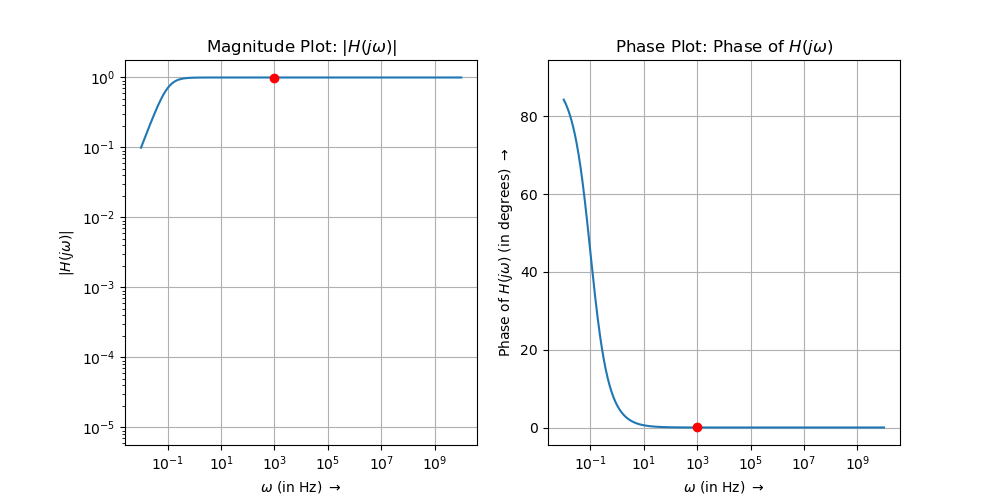

<IPython.core.display.Javascript object>


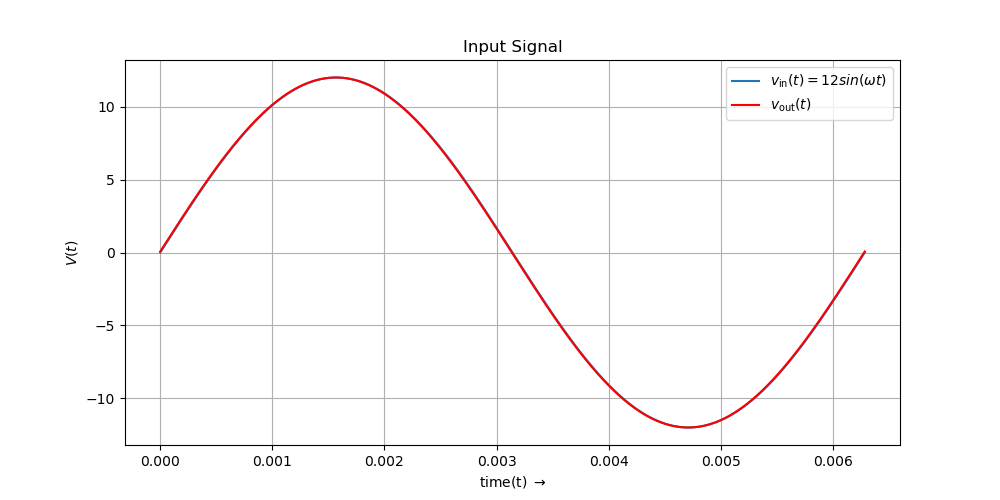

interactive(children=(FloatLogSlider(value=10000000.0, description='R (Ω)', max=7.0, min=1.0, step=1.0), Float…

In [39]:
# EXAMPLE: Let's plot $\omega$ in the range 10 ** -2 to 10 ** 5:

#Define your transfer function
def H_example(w, R=1e3):
    C = 1e-6
    return 1j * w * R * C / (1 + 1j * w * R * C)

#Pass in your transfer function and the log range to gen_tf
update, r_slider, w_slider = gen_tf(H_example)
interactive(update,
            R0=r,
            w_in=w)

# 1a : RC circuit

<IPython.core.display.Javascript object>


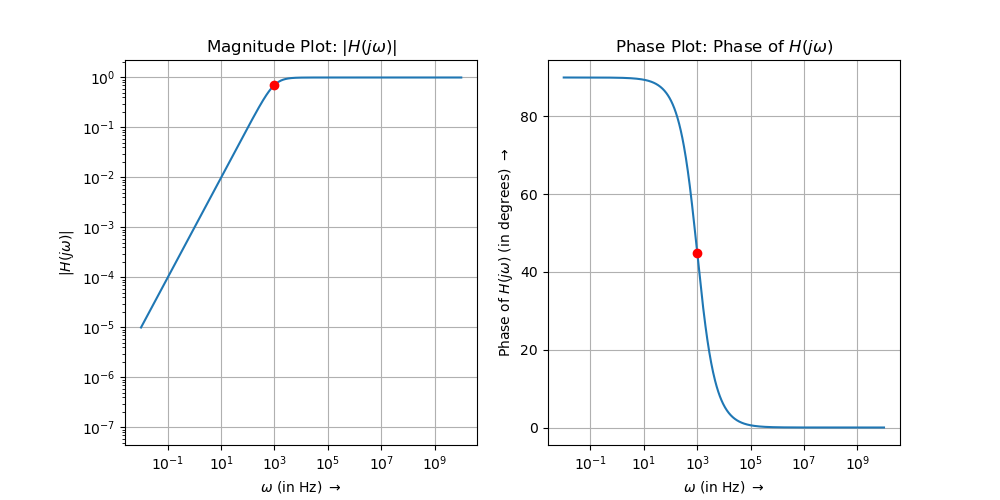

<IPython.core.display.Javascript object>


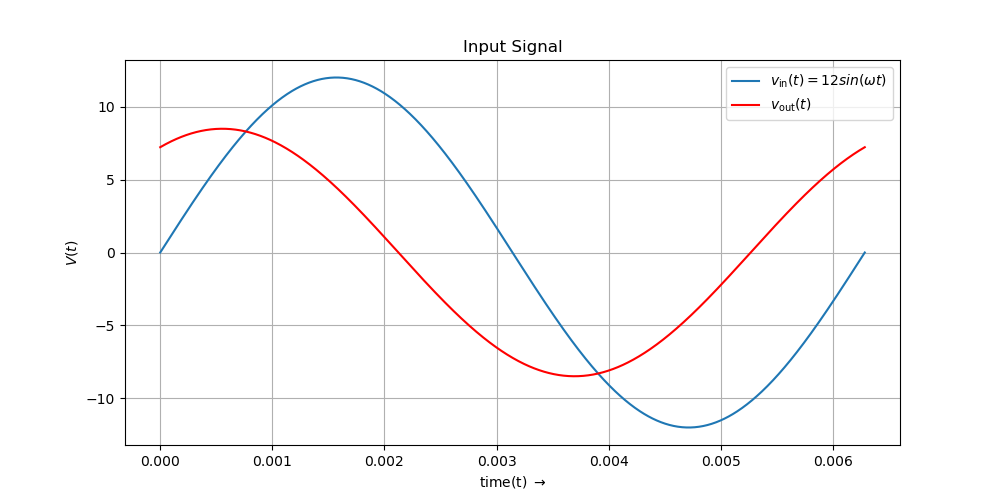

interactive(children=(FloatLogSlider(value=1000.0, description='R (Ω)', max=7.0, min=1.0, step=1.0), FloatLogS…

In [33]:
#Define the transfer function from 4c
def H_RC(w, R=1e3):
    C = 10e-9 # in farad
    return (1j * w * R * C) / (1 + (1j * w * R * C)) 

#Pass in your transfer function and the log range to gen_tf
update, r_slider, w_slider = gen_tf(H_RC)
interactive(update,
            R0=r_slider,
            w_in=w_slider)

# 1b: LR circuit

<IPython.core.display.Javascript object>


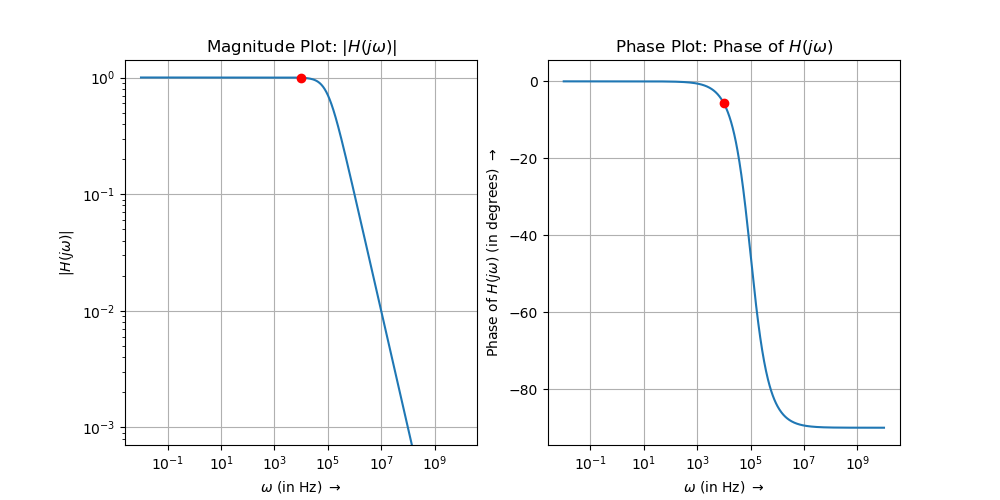

<IPython.core.display.Javascript object>


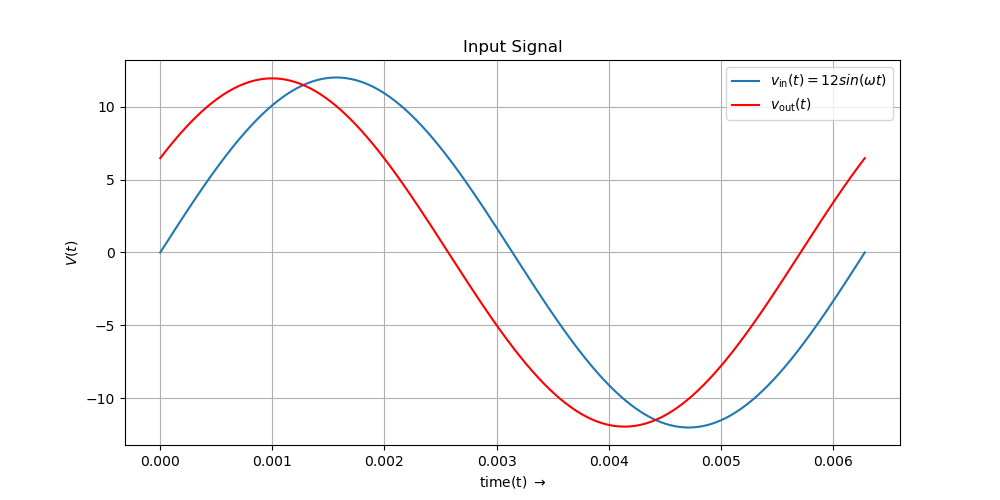

interactive(children=(FloatLogSlider(value=1000.0, description='R (Ω)', max=7.0, min=1.0, step=1.0), FloatLogS…

In [34]:
def H_LR(w, R=1e3):
    L = 100e-6 # in henry
    return R / (R + 1j * w * L)

#Pass in your transfer function and the log range to gen_tf
update, r_slider, w_slider = gen_tf(H_LR)
interactive(update,
            R0=r_slider,
            w_in=w_slider)

## 1.c RCR circuit

<IPython.core.display.Javascript object>


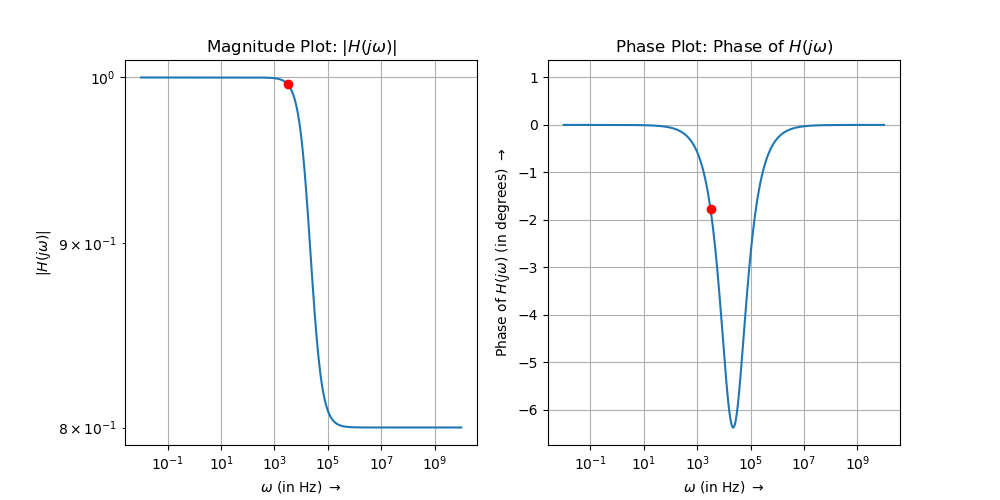

<IPython.core.display.Javascript object>


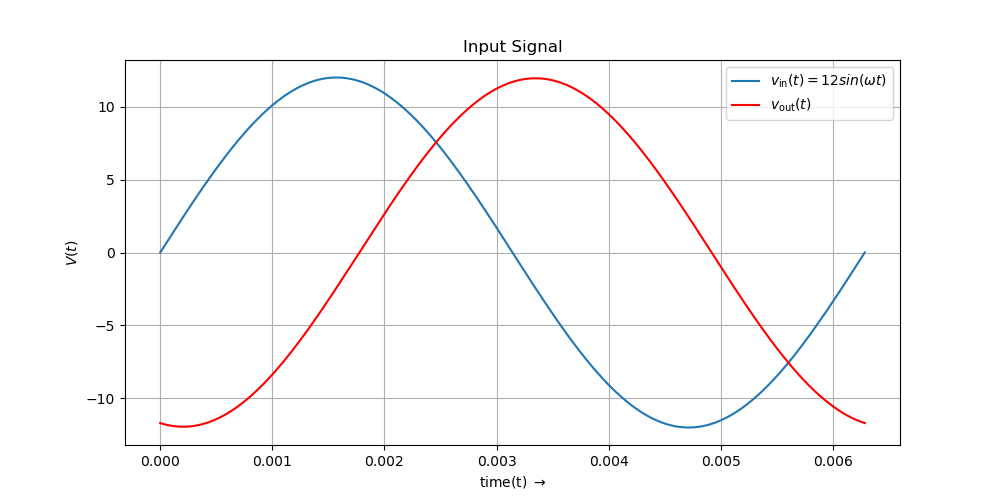

interactive(children=(FloatLogSlider(value=1000.0, description='R (Ω)', max=8.0, min=-1.0, step=0.5), FloatLog…

In [41]:
def H_RCR(w, R=1e3):
    R_2 = 4e3 # in ohms
    C = 10e-9 # in farads

    return (1+1j*w*R_2*C)/(1+1j*w*C*(R+R_2))
    ## TODO : Calculate the transfer function using R_1, R_2, and C
    
#Pass in your transfer function and the log range to gen_tf
update, r_slider, w_slider = gen_tf(H_RCR)
interactive(update,
            R0=r_slider,
            w_in=w_slider)

## Band Pass filter

<IPython.core.display.Javascript object>


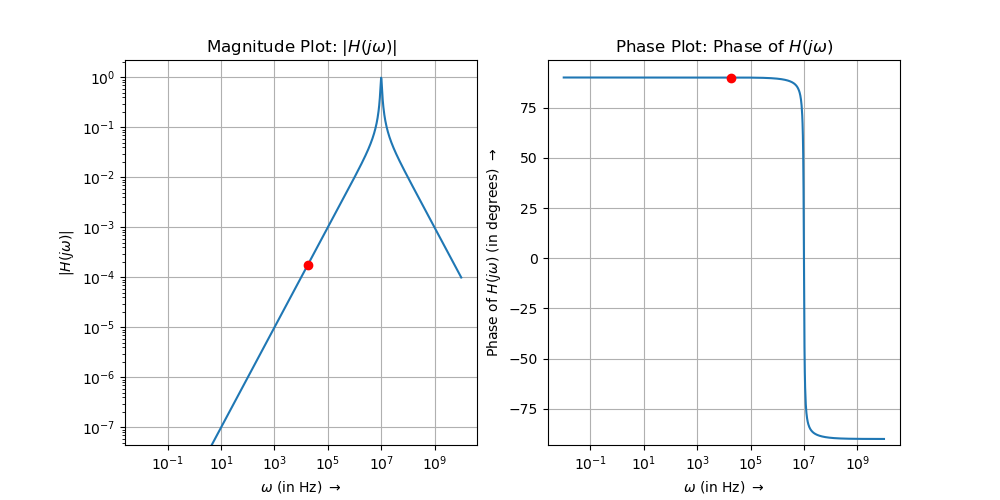

<IPython.core.display.Javascript object>


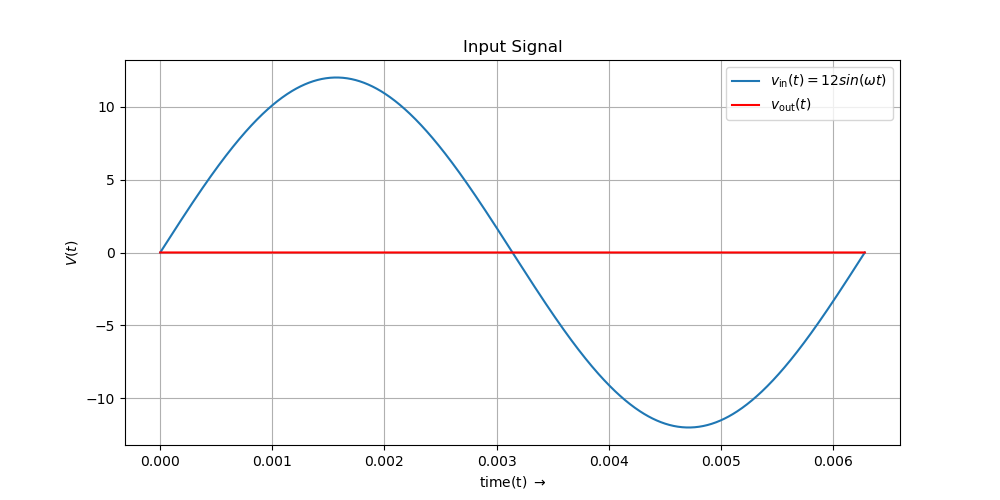

interactive(children=(FloatLogSlider(value=1000.0, description='R (Ω)', max=8.0, min=-1.0, step=0.25), FloatLo…

In [44]:
#Define the transfer function from 2c
def H_RLC(w, R=1e3):
    C = 1e-8 # in farad
    L = 1e-6 # in henry
    return R / (R + 1j * (w * L - 1 / (w * C)) )

#Pass in your transfer function and the log range to gen_tf
update, r_slider, w_slider = gen_tf(H_RLC)
interactive(update,
            R0=r_slider,
            w_in=w_slider)